In [114]:
import pandas as pd 

In [115]:
df=pd.read_csv("../Dataset/Churn_Modelling.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [116]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [117]:
df.duplicated().sum()

0

In [118]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [119]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [120]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [121]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [122]:
df=pd.get_dummies(df,drop_first=True)

In [123]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [124]:
x=df.drop(columns=["Exited"])
y=df["Exited"]

In [125]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)


In [127]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [128]:
x.shape[1]

11

In [129]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [130]:
model=Sequential([
    Input(shape=(x.shape[1],)),
    Dense(5,activation="relu"),
    Dense(3,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [131]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82 (328.00 B)

 Trainable params: 82 (328.00 B)

 Non-trainable params: 0 (0.00 B)

In [132]:
model.compile(loss="binary_crossentropy",optimizer="Adam")

In [133]:
history=model.fit(x_train_scaled,y_train,epochs=10,validation_split=.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6657 - val_loss: 0.5791
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5497 - val_loss: 0.5072
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4897 - val_loss: 0.4793
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4801 - val_loss: 0.4599
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4541 - val_loss: 0.4468
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4362 - val_loss: 0.4364
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4352 - val_loss: 0.4277
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4212 - val_loss: 0.4204
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4231 - val_loss: 0.4135
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4114 - val_loss: 0.4074


In [134]:
model.layers[0].get_weights()

[array([[ 0.03184691, -0.252676  ,  0.06277491,  0.28537613,  0.1966988 ],
        [-0.78447556,  0.3360151 , -0.7409346 , -0.13898642, -0.29533684],
        [ 0.0156539 , -0.06795165,  0.03882306,  0.03529396,  0.01039547],
        [ 0.27165774,  0.5374559 , -0.5174081 ,  0.0564371 ,  0.6627064 ],
        [-0.02502896,  0.7510585 ,  0.03664807, -1.1805655 , -0.12215492],
        [-0.06726018, -0.04616628, -0.00811039, -0.3037214 , -0.03962715],
        [-0.15481137, -0.39041835,  0.5314553 , -0.25741157,  0.13103753],
        [-0.12865604,  0.03377729, -0.02737744, -0.18245563,  0.0258603 ],
        [ 0.05950757,  0.3205254 , -0.3663211 , -0.10552134, -0.5369488 ],
        [-0.40510345, -0.11193133,  0.01640675,  0.10126273,  0.25744027],
        [-0.00193659, -0.38633865,  0.29637071,  0.10428765,  0.24855196]],
       dtype=float32),
 array([ 0.22773725, -0.20911293,  0.7276612 ,  0.07631698,  0.1449159 ],
       dtype=float32)]

In [135]:
model.layers[1].get_weights()

[array([[-0.5206939 ,  0.539524  ,  0.4743475 ],
        [-0.38496655, -0.28644586, -0.15787683],
        [ 0.71929204,  0.4099026 ,  0.47194922],
        [-0.25869852, -0.11405274, -0.9161595 ],
        [-0.20005587,  0.47914004, -0.2850642 ]], dtype=float32),
 array([-0.02586158,  0.24508622,  0.38799286], dtype=float32)]

In [136]:
y_pred=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [137]:
import numpy as np

y_pred=np.where(y_pred>=.5,1,0)

In [138]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [139]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.798

In [144]:
history.history

{'loss': [0.6345204710960388,
  0.5266314744949341,
  0.48495346307754517,
  0.4654771685600281,
  0.45141124725341797,
  0.44103607535362244,
  0.43288689851760864,
  0.4255698323249817,
  0.41863155364990234,
  0.41183531284332275],
 'val_loss': [0.5791347622871399,
  0.5072299838066101,
  0.47927936911582947,
  0.4599491059780121,
  0.44677138328552246,
  0.43639302253723145,
  0.4276924133300781,
  0.4204377830028534,
  0.4135260283946991,
  0.40739864110946655]}

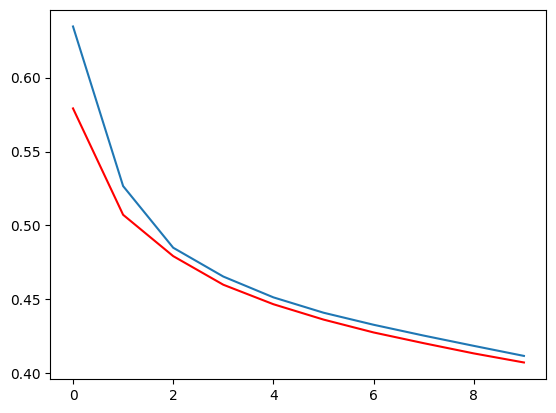

In [145]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"],"r")